In [10]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import pickle
from tqdm import tqdm

In [19]:
DATADIR = "D:/odonata"
CATEGORIES = np.array(os.listdir(DATADIR))
IMG_SIZE = 227

CATEGORIES = np.fromiter(
    (category for category in CATEGORIES if len(os.listdir(os.path.join(DATADIR, category))) > 400),
    dtype = CATEGORIES.dtype
)

print(len(CATEGORIES))

54


In [29]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = np.where(CATEGORIES == category)[0][0]
        
        for _ in tqdm(range(400)):
            try:
                img_array = cv2.imread(os.path.join(path, os.listdir(path)[_]))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                new_array = cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB)
                
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [00:06<00:00, 59.90it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [00:02<00:00, 193.24it/s]


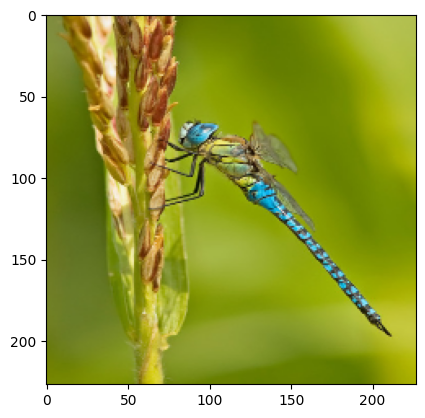

In [30]:
plt.imshow(training_data[0][0])
plt.show()

In [31]:
random.shuffle(training_data)

In [34]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [33]:
pickle_out = open("D:/X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("D:/y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [35]:
print(X.shape)

(21599, 227, 227, 3)
